<a href="https://colab.research.google.com/github/abdullahkhafabi-010/MACHINE-LEARNING/blob/main/WEEK11/WEEK11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Abdullah Khafabi

Nim: 2041720050


Kelas: 3A

# Job Sheet 11: Convolutional Neural Network (CNN)

# Praktikum 1

In [16]:
from google.colab import drive

#Accessing My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Langkah 1 - Import Library

In [17]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

Langkah 2 - Pra Pengolahan Data

Langkah 2.1. Pra Pengolahan Data Training

In [18]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Machine Learning/week11/dataset',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 10002 images belonging to 3 classes.


Langkah 2.2. Pra Pengolahan Data Testing

In [19]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Machine Learning/week11/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


Langkah 3 - Pembuatan Model CNN

Langkah 3.1.  - Inisiasi Model CNN

In [20]:
cnn = tf.keras.models.Sequential()

Langkah 3.2. - Pembuatan Layer Konvolusi 1

In [21]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

Langkah 3.3 - Pembuatan Layer Pooling 1

In [22]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

Langkah 3.4 - Pembuatan Layer Konvolusi 2 dan Pooling 2

In [23]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

Langkah 3.5 - Flattening

In [24]:
cnn.add(tf.keras.layers.Flatten())

Langkah 3.6 - Fully Connected Layer 1 (Input)

In [25]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

Langkah 3.7 - Fully Connected Layer 2 (Output)

In [26]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

Langkah 3.8 - Compile Model CNN

In [27]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Langkah 4 - Fit CNN

In [28]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
313/313 [==============================] - 2380s 8s/step - loss: -40802368.0000 - accuracy: 0.2000 - val_loss: 142995584.0000 - val_accuracy: 0.5000
Epoch 2/25
313/313 [==============================] - 100s 319ms/step - loss: -1712511488.0000 - accuracy: 0.2000 - val_loss: 2843702016.0000 - val_accuracy: 0.5000
Epoch 3/25
313/313 [==============================] - 101s 324ms/step - loss: -12060676096.0000 - accuracy: 0.2000 - val_loss: 14308459520.0000 - val_accuracy: 0.5000
Epoch 4/25
313/313 [==============================] - 102s 326ms/step - loss: -43002507264.0000 - accuracy: 0.2000 - val_loss: 42825437184.0000 - val_accuracy: 0.5000
Epoch 5/25
313/313 [==============================] - 103s 329ms/step - loss: -108343672832.0000 - accuracy: 0.2000 - val_loss: 97242431488.0000 - val_accuracy: 0.5000
Epoch 6/25
313/313 [==============================] - 99s 318ms/step - loss: -222921621504.0000 - accuracy: 0.2000 - val_loss: 186581549056.0000 - val_accuracy: 0.5000
Epoch

Langkah 5 - Prediksi dengan 1 Citra

In [29]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/Machine Learning/week11/dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 [==============================] - 0s 153ms/step


# Praktikum 2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Langkah 1 - Load Library

In [3]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Langkah 2 - Unduh Dataset CIFAR

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 8s 0us/step


Langkah 3 - Verifikasi Data

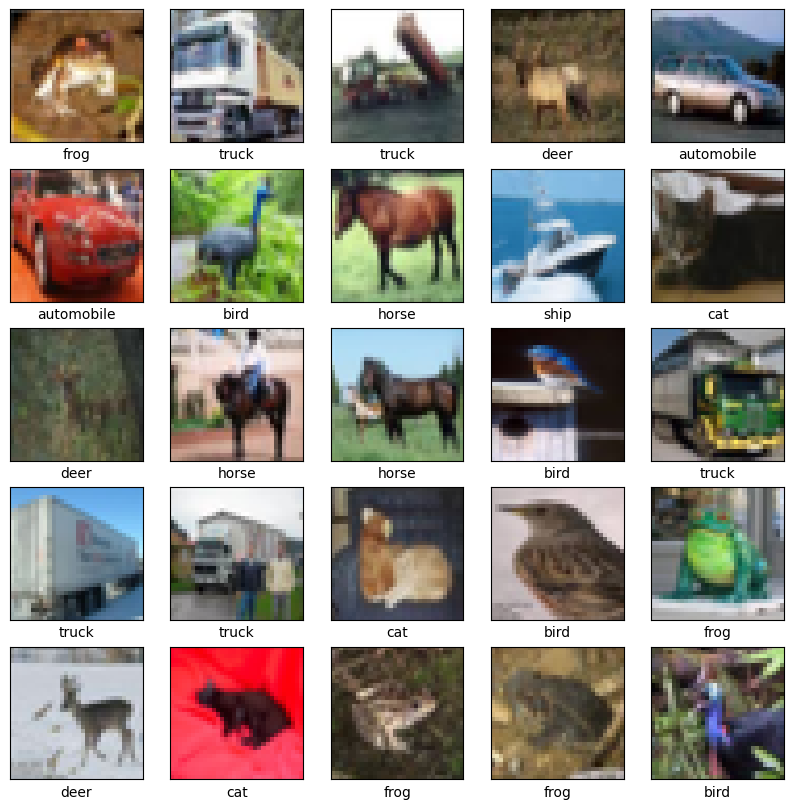

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  # The CIFAR labels happen to be arrays,
  # which is why you need the extra index
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

Langkah 4 - Buat Model CNN

Langkah 4.1. - Buat Layer Konvolusi

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Langkah 4.2. - Cek Arsitektur Konvolusi

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

Langkah 4.3. - Tambahkan Layer Fully Connected

In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

Langkah 4.4. - Cek Arsitektur Model CNN

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

Langkah 4.5. - Compile Model CNN

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Langkah 5 - Fit Model

In [11]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 83s 52ms/step - loss: 1.5114 - accuracy: 0.4484 - val_loss: 1.2545 - val_accuracy: 0.5455
Epoch 2/10
1563/1563 [==============================] - 76s 49ms/step - loss: 1.1416 - accuracy: 0.5957 - val_loss: 1.0863 - val_accuracy: 0.6192
Epoch 3/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.9879 - accuracy: 0.6542 - val_loss: 0.9708 - val_accuracy: 0.6618
Epoch 4/10
1563/1563 [==============================] - 82s 53ms/step - loss: 0.8903 - accuracy: 0.6878 - val_loss: 0.9070 - val_accuracy: 0.6794
Epoch 5/10
1563/1563 [==============================] - 79s 50ms/step - loss: 0.8174 - accuracy: 0.7141 - val_loss: 0.9112 - val_accuracy: 0.6874
Epoch 6/10
1563/1563 [==============================] - 87s 56ms/step - loss: 0.7611 - accuracy: 0.7349 - val_loss: 0.8664 - val_accuracy: 0.7000
Epoch 7/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.7119 - accuracy: 0.7499 - val_loss: 0.8749 -

Langkah 6 - Evaluasi Model

313/313 - 3s - loss: 0.9215 - accuracy: 0.6993 - 3s/epoch - 11ms/step


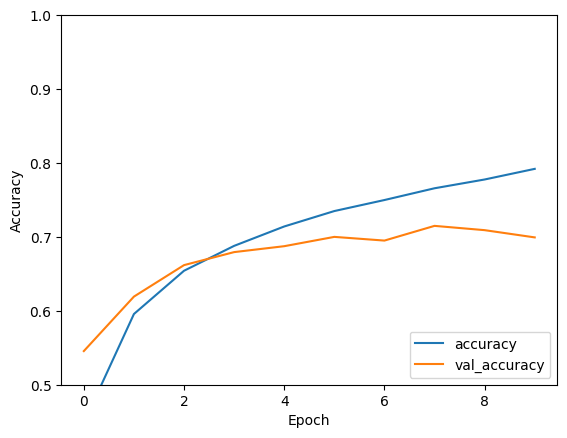

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

Langkah 7 - Cetak Hasil Akurasi

In [13]:
print(test_acc)

0.6992999911308289


# Tugas

Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.

In [ ]:
from tensorflow.keras.datasets import cifar10
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, GlobalAveragePooling2D, Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('Training set shape:', X_train.shape)
print('Test set shape:', X_test.shape)

170498071/170498071 [==============================] - 3s 0us/step
Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)


In [ ]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
def cnn_model():
    model = Sequential()
    # First Conv layer
    model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4), input_shape=(32,32,3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # Second Conv layer
    model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # Third, fourth, fifth convolution layer
    model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # Fully Connected layers
    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))

    model.summary()
    return model


In [ ]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)
datagen.fit(X_train)

In [ ]:
model = cnn_model()
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0003),
    metrics=['accuracy']
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 128)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 256)         0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 256)         0

In [ ]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    steps_per_epoch=len(X_train) // 64,
    epochs=50,
    validation_data=(X_valid, y_valid),
    verbose=1
)

Epoch 1/50
625/625 [==============================] - 46s 51ms/step - loss: 2.1797 - accuracy: 0.1829 - val_loss: 1.8023 - val_accuracy: 0.3227
Epoch 2/50
625/625 [==============================] - 31s 49ms/step - loss: 1.7715 - accuracy: 0.3321 - val_loss: 1.5482 - val_accuracy: 0.4161
Epoch 3/50
625/625 [==============================] - 31s 50ms/step - loss: 1.5674 - accuracy: 0.4258 - val_loss: 1.3301 - val_accuracy: 0.5114
Epoch 4/50
625/625 [==============================] - 31s 50ms/step - loss: 1.4392 - accuracy: 0.4857 - val_loss: 1.2258 - val_accuracy: 0.5651
Epoch 5/50
625/625 [==============================] - 32s 51ms/step - loss: 1.3465 - accuracy: 0.5326 - val_loss: 1.1432 - val_accuracy: 0.6005
Epoch 6/50
625/625 [==============================] - 30s 49ms/step - loss: 1.2526 - accuracy: 0.5764 - val_loss: 1.0568 - val_accuracy: 0.6316
Epoch 7/50
625/625 [==============================] - 31s 49ms/step - loss: 1.1812 - accuracy: 0.6041 - val_loss: 1.0893 - val_accuracy:

In [ ]:
scores = model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.6727 - accuracy: 0.8254


<Axes: >

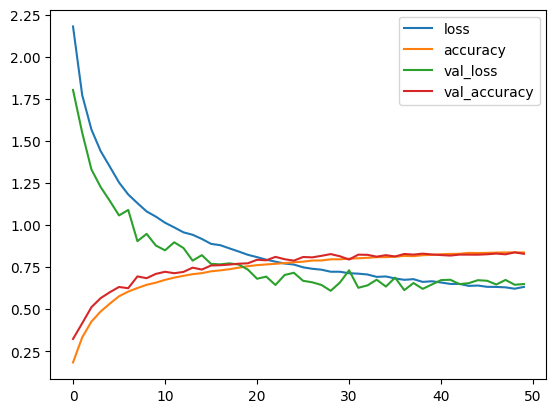

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
scores = model.evaluate(X_test, y_test)
pred = model.predict(X_test)
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)
errors = y_pred - y_true != 0
print(classification_report(y_true, y_pred))

313/313 [==============================] - 2s 5ms/step
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1000
           1       0.90      0.95      0.92      1000
           2       0.86      0.69      0.77      1000
           3       0.74      0.61      0.67      1000
           4       0.74      0.86      0.80      1000
           5       0.79      0.72      0.75      1000
           6       0.71      0.95      0.82      1000
           7       0.92      0.85      0.88      1000
           8       0.90      0.92      0.91      1000
           9       0.85      0.91      0.88      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.82     10000
weighted avg       0.83      0.83      0.82     10000



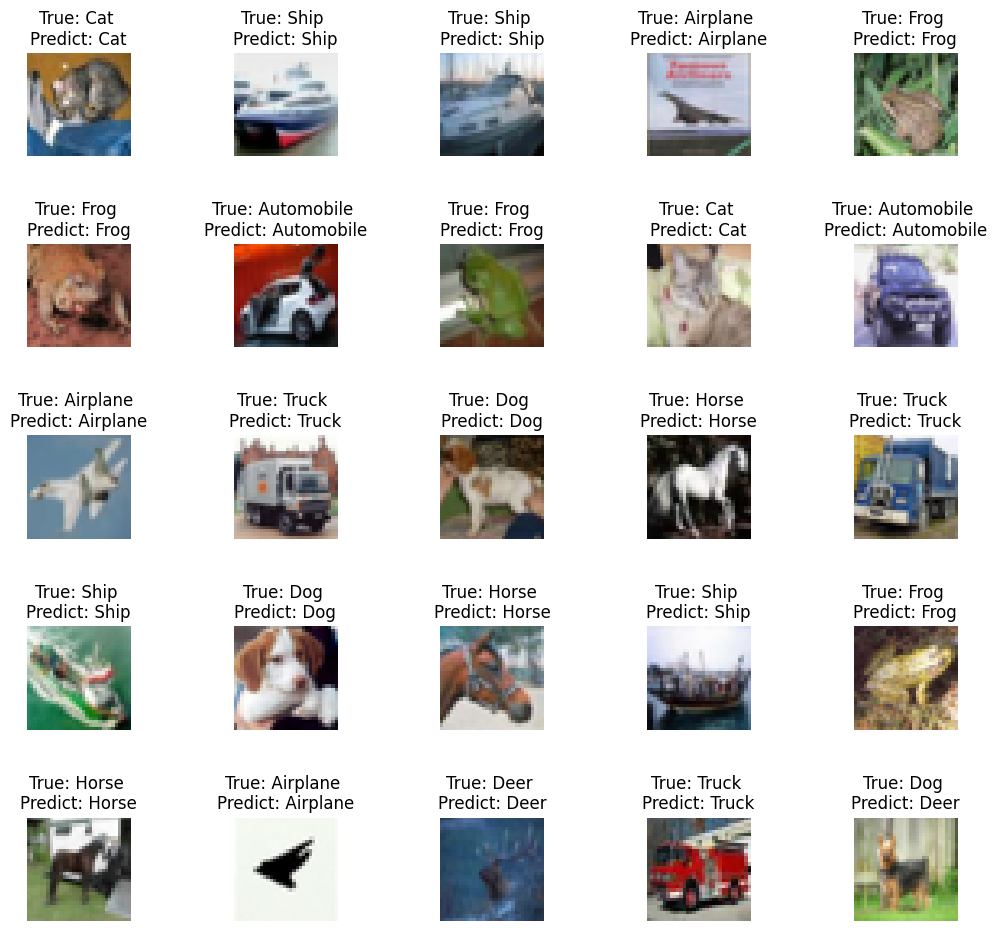

In [ ]:
fig, axes = plt.subplots(5, 5, figsize=(12,12))
axes = axes.ravel()
for i in np.arange(25):
    axes[i].imshow(X_test[i])
    axes[i].set_title('True: %s \nPredict: %s' % (labels[y_true[i]], labels[y_pred[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

Buatlah model CNN untuk klasifikasi dataset MNIST

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Memuat dataset MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Normalisasi gambar ke rentang [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
# Perbaikan: Mengimpor to_categorical dari tensorflow.keras.utils
from tensorflow.keras.utils import to_categorical

# Mengonversi label ke format one-hot encoding
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

In [ ]:
# Menampilkan informasi tentang dataset
print("Jumlah data latihan:", len(train_images))
print("Jumlah data pengujian:", len(test_images))
print("Ukuran gambar:", train_images[0].shape)

Jumlah data latihan: 60000
Jumlah data pengujian: 10000
Ukuran gambar: (28, 28)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Membangun model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [ ]:
# Mengompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Menampilkan ringkasan model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [ ]:
# Melatih model
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, verbose=2, validation_split=0.3)

Epoch 1/10
329/329 - 5s - loss: 0.3671 - accuracy: 0.8843 - val_loss: 0.0902 - val_accuracy: 0.9718 - 5s/epoch - 14ms/step
Epoch 2/10
329/329 - 2s - loss: 0.1013 - accuracy: 0.9700 - val_loss: 0.0678 - val_accuracy: 0.9797 - 2s/epoch - 5ms/step
Epoch 3/10
329/329 - 2s - loss: 0.0709 - accuracy: 0.9792 - val_loss: 0.0495 - val_accuracy: 0.9853 - 2s/epoch - 5ms/step
Epoch 4/10
329/329 - 2s - loss: 0.0566 - accuracy: 0.9830 - val_loss: 0.0508 - val_accuracy: 0.9854 - 2s/epoch - 6ms/step
Epoch 5/10
329/329 - 2s - loss: 0.0448 - accuracy: 0.9863 - val_loss: 0.0462 - val_accuracy: 0.9867 - 2s/epoch - 5ms/step
Epoch 6/10
329/329 - 2s - loss: 0.0366 - accuracy: 0.9894 - val_loss: 0.0443 - val_accuracy: 0.9887 - 2s/epoch - 6ms/step
Epoch 7/10
329/329 - 2s - loss: 0.0310 - accuracy: 0.9907 - val_loss: 0.0437 - val_accuracy: 0.9886 - 2s/epoch - 7ms/step
Epoch 8/10
329/329 - 2s - loss: 0.0280 - accuracy: 0.9914 - val_loss: 0.0428 - val_accuracy: 0.9882 - 2s/epoch - 5ms/step
Epoch 9/10
329/329 - 2s

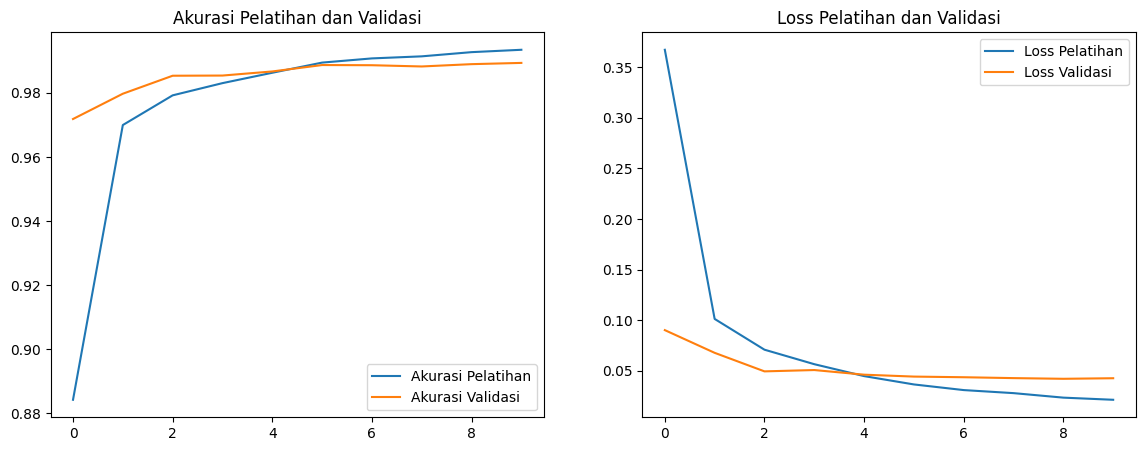

In [ ]:
import matplotlib.pyplot as plt

# Plot sejarah pelatihan
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.legend(loc='lower right')
plt.title('Akurasi Pelatihan dan Validasi')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Pelatihan')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.legend(loc='upper right')
plt.title('Loss Pelatihan dan Validasi')

plt.show()

In [ ]:
# Evaluasi model pada kumpulan data uji
validation_loss, validation_accuracy = model.evaluate(test_images, test_labels, verbose=False)
print("Loss Validasi:", validation_loss)
print("Akurasi Validasi:", validation_accuracy)

Loss Validasi: 0.0328492671251297
Akurasi Validasi: 0.991100013256073


In [ ]:
# Menghasilkan nilai prediksi pada kumpulan data uji
y_pred_enc = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
# Mendekode nilai prediksi
y_pred = [np.argmax(i) for i in y_pred_enc]

In [ ]:
# Menampilkan laporan klasifikasi
print(classification_report(np.argmax(test_labels, axis=1), y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Text(58.222222222222214, 0.5, 'Aktual')

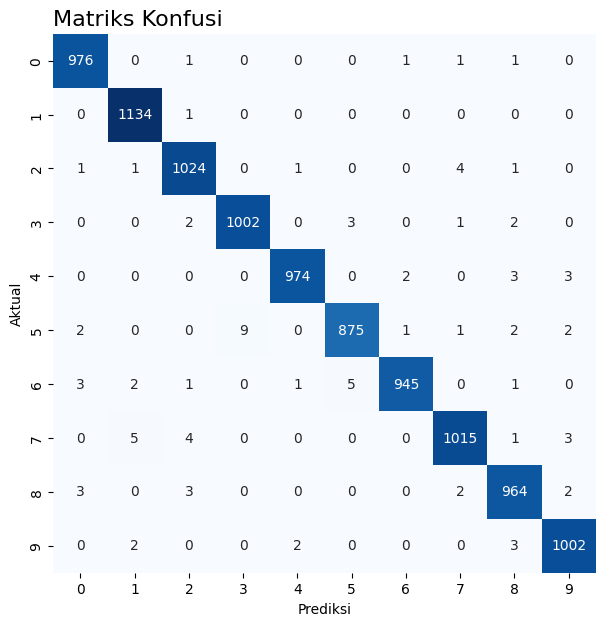

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Membuat matriks konfusi dan menampilkannya dengan heatmap
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(confusion_matrix(np.argmax(test_labels, axis=1), y_pred), annot=True, cbar=False, fmt='1d', cmap='Blues', ax=ax)
ax.set_title('Matriks Konfusi', loc='left', fontsize=16)
ax.set_xlabel('Prediksi')
ax.set_ylabel('Aktual')

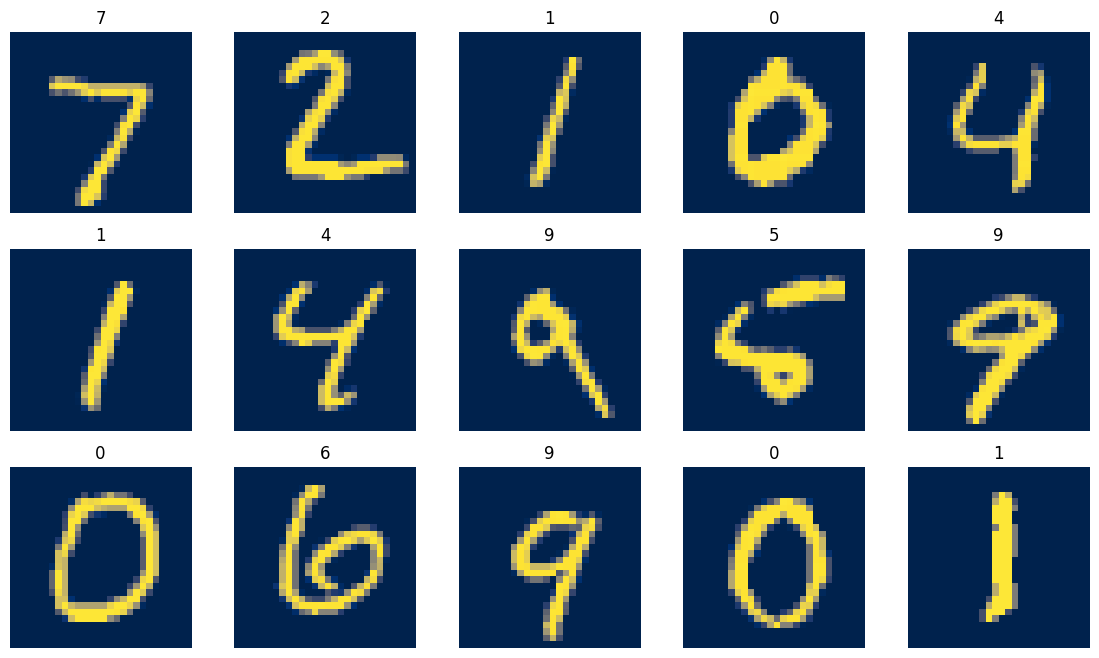

In [ ]:
# Menampilkan target yang diprediksi pada setiap gambar
# (label di atas gambar adalah label yang diprediksi)
plt.figure(figsize=(14, 8))
for ind, row in enumerate(test_images[:15]):
    plt.subplot(3, 5, ind+1)
    plt.title(y_pred[ind])
    img = row.reshape(28, 28)
    plt.axis('off')
    plt.imshow(img, cmap='cividis')